In [2]:
%pip install --upgrade pip

%pip install numpy
%pip install pandas
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
## Casey Data Preprocessing ##
df_train.head()
print(df_train['age_upon_intake'].unique())

# drop the rows with missing values in the 'age_upon_intake' column
df_train[df_train['age_upon_intake'].isna()]
df_train = df_train.dropna(subset=['age_upon_intake'])

df_train['sex_upon_intake'].unique()
df_train[df_train['sex_upon_intake'].isna()]['sex_upon_intake'] = 'Unknown'

# Function to convert age strings into years
def convert_age(age_str):
    # Expecting age_str in the format "<number> <unit>"
    # e.g., "2 years", "8 months", "3 weeks", "15 days"
    parts = age_str.split()
    if len(parts) != 2:
        return None
    try:
        num = float(parts[0])
    except ValueError:
        return None
    unit = parts[1].lower()
    if "year" in unit:
        return num
    elif "month" in unit:
        return num / 12
    elif "week" in unit:
        return num / 52
    elif "day" in unit:
        return num / 365
    else:
        return None

df_train['age_upon_intake'] = df_train['age_upon_intake'].apply(convert_age)

df_train[df_train['age_upon_intake'] < 0].head()



['8 years' '11 months' '2 years' '6 years' '6 months' '4 weeks' '5 months'
 '4 years' '1 month' '14 years' '2 weeks' '1 week' '2 months' '18 years'
 '9 years' '4 months' '1 day' '1 year' '3 years' '5 years' '8 months'
 '6 days' '7 years' '3 months' '12 years' '3 weeks' '9 months' '10 years'
 '10 months' '7 months' '0 years' '1 weeks' '5 days' '17 years' '2 days'
 '11 years' '4 days' '3 days' '15 years' '13 years' '5 weeks' '16 years'
 '19 years' '-1 years' '20 years' '-4 years' '22 years' nan '24 years']


/var/folders/yf/n0zzld6945vfyf6hj9_n1g4c0000gn/T/ipykernel_69719/116464133.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[df_train['sex_upon_intake'].isna()]['sex_upon_intake'] = 'Unknown'


,id,name,intake_time,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,outcome_time,date_of_birth,outcome_type
6828,A725472,Rascal,02/26/2019 11:25:00 AM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,-1.0,Chihuahua Shorthair Mix,White/Brown,07/24/2016 03:54:00 PM,04/29/2020,Adoption
30959,A783723,Pina,11/05/2018 11:00:00 AM,3108 Crownover Street in Austin (TX),Stray,Normal,Cat,Intact Female,-4.0,Domestic Shorthair,White/Orange,11/12/2018 11:53:00 AM,02/07/2023,Adoption
44133,A797495,Ace,06/14/2019 11:34:00 AM,6814 East Riverside Drive in Austin (TX),Stray,Normal,Dog,Neutered Male,-1.0,Cairn Terrier,Black/Tan,06/17/2021 11:46:00 AM,12/16/2020,Transfer
70654,A753893,Chato,06/26/2015 04:30:00 PM,6709 Ponca Street in Austin (TX),Stray,Normal,Dog,Intact Male,-1.0,American Bulldog Mix,White/Brown,09/10/2017 12:00:00 AM,07/12/2016,Transfer


            id    name             intake_time  \
6828   A725472  Rascal  02/26/2019 11:25:00 AM   
30959  A783723    Pina  11/05/2018 11:00:00 AM   
44133  A797495     Ace  06/14/2019 11:34:00 AM   
70654  A753893   Chato  06/26/2015 04:30:00 PM   

                                 found_location      intake_type  \
6828                                Austin (TX)  Owner Surrender   
30959      3108 Crownover Street in Austin (TX)            Stray   
44133  6814 East Riverside Drive in Austin (TX)            Stray   
70654          6709 Ponca Street in Austin (TX)            Stray   

      intake_condition animal_type sex_upon_intake  age_upon_intake  \
6828            Normal         Dog   Neutered Male             -1.0   
30959           Normal         Cat   Intact Female             -4.0   
44133           Normal         Dog   Neutered Male             -1.0   
70654           Normal         Dog     Intact Male             -1.0   

                         breed         color        

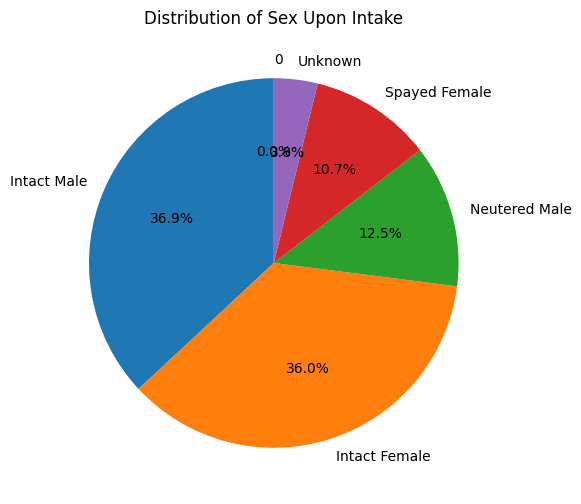

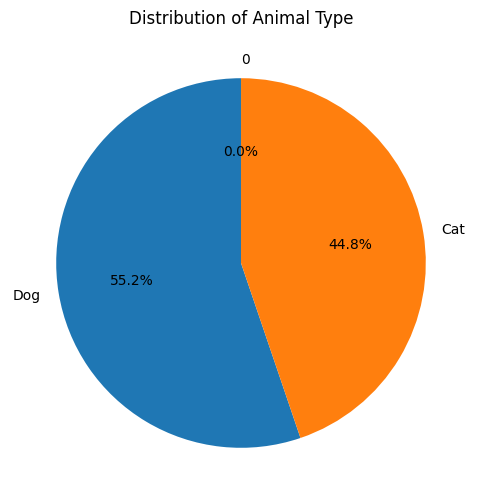

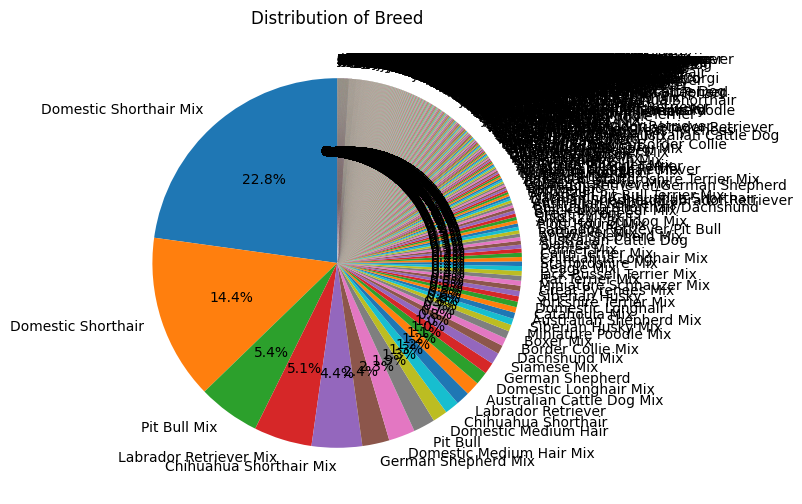

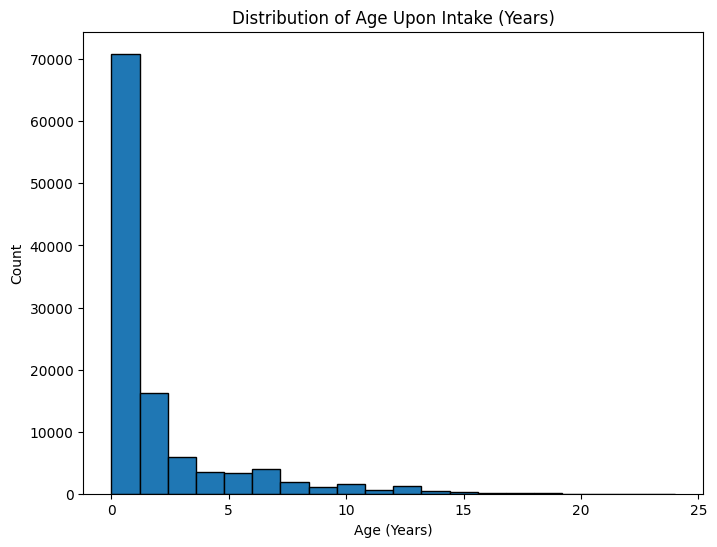

In [ ]:
# set negative ages to 0
df_train[df_train['age_upon_intake'] < 0] = 0

# Pie chart for 'sex_upon_intake'
plt.figure(figsize=(6,6))
df_train['sex_upon_intake'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Sex Upon Intake")
plt.ylabel('')
plt.show()

# Pie chart for 'animal_type'
plt.figure(figsize=(6,6))
df_train['animal_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Animal Type")
plt.ylabel('')
plt.show()

# Pie chart for 'breed'
plt.figure(figsize=(6,6))
df_train['breed'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Breed")
plt.ylabel('')
plt.show()

# Bar chart (histogram) for 'age_in_years'
plt.figure(figsize=(8,6))
plt.hist(df_train['age_in_years'].dropna(), bins=20, edgecolor='black')
plt.title("Distribution of Age Upon Intake (Years)")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Count the frequency of each breed
breed_counts = df_train['breed'].value_counts()

rare_breeds = breed_counts[breed_counts <= 3].index

# Filter the DataFrame for records with these rare breeds
rare_records = df_train[df_train['breed'].isin(rare_breeds)]

# Get the number of such records
rare_count = rare_records.shape[0]
print("Number of rare breeds:", rare_count)

Number of rare breeds: 2330


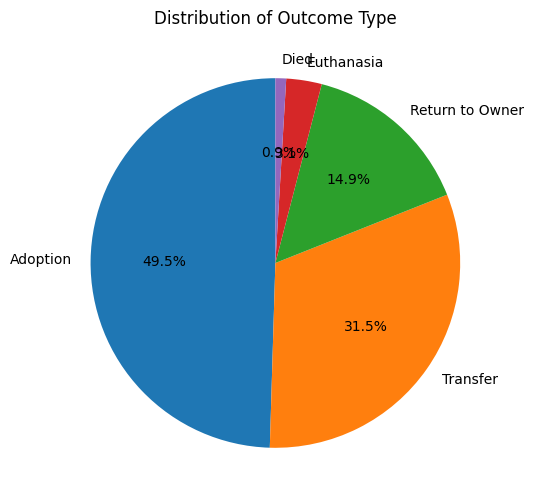

In [ ]:
# Pie chart for 'outcome_type'
plt.figure(figsize=(6,6))
df_train['outcome_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Outcome Type")
plt.ylabel('')
plt.show()

In [34]:
# Rebecca's slay data exploration block /ᐠ - ˕ -マ 
# intake time, color, outcome time, date of birth

In [ ]:
# Nneoma's data visualation
print('records with missing names:', df_train['name'].isna().sum())  

print('records that are blank or has numbers:', non_alpha_values.sum()) # does not wrok but you get the idea. fix pls